<a href="https://colab.research.google.com/github/Hieudo02/AI-Exercise/blob/main/finalExam_HumanDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PEOPLE COUNTING

In [51]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

target_width = 40
target_height = 40
folder = '/content/drive/MyDrive/Colab Notebooks/finalExam_Image/Human_NonHuman/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Human'):
    output = 1.0

  img = load_img(folder + file, target_size = (target_width, target_height))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/finalExam_Image_npy/people_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/finalExam_Image_npy/people_labels.npy', labels)

(2607, 40, 40, 3) (2607,)


In [52]:
# Split data into train & test (80-20)
split_index = int(0.2 * len(photos))
test_photos, test_labels = photos[:split_index], labels[:split_index]
train_photos, train_labels = photos[split_index:], labels[split_index:]

print(test_photos.shape, train_photos.shape)

(521, 40, 40, 3) (2086, 40, 40, 3)


In [53]:
train_photos = train_photos.reshape((2086, target_width, target_height, 3))
train_photos = train_photos.astype('float32')/255

test_photos = test_photos.reshape((521, target_width, target_height, 3))
test_photos = test_photos.astype('float32')/255

In [54]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 2)
test_labels = to_categorical(test_labels, 2)

In [55]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 30
epochs = 5
classes = 2

In [56]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (target_width, target_height, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

# model.add(MaxPooling2D((2,2), padding = 'same'))
# model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
# model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

# model.add(MaxPooling2D((2,2), padding = 'same'))
# model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
# model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

# model.add(MaxPooling2D((2,2), padding = 'same'))
# model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
# model.add(LeakyReLU(alpha = 0.1))
# #Add Dropout
# model.add(Dropout(0.25))

In [57]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 conv2d_26 (Conv2D)          (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                      

In [67]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_photos, train_labels, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/5
70/70 [==============================] - 33s 449ms/step - loss: 0.3920 - accuracy: 0.8255
Epoch 2/5
70/70 [==============================] - 32s 456ms/step - loss: 0.2894 - accuracy: 0.8797
Epoch 3/5
70/70 [==============================] - 32s 455ms/step - loss: 0.2632 - accuracy: 0.8912
Epoch 4/5
70/70 [==============================] - 32s 458ms/step - loss: 0.1877 - accuracy: 0.9223
Epoch 5/5
70/70 [==============================] - 31s 450ms/step - loss: 0.1571 - accuracy: 0.9382


In [68]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_photos, test_labels)
print('Test accuracy:', test_acc)

17/17 [==============================] - 1s 70ms/step - loss: 0.5883 - accuracy: 0.7639
Test accuracy: 0.7639155387878418


In [82]:
model.save('/content/drive/MyDrive/Colab Notebooks/finalExam_model/HumanDetectionModel.h5')

1/1 [==============================] - 0s 39ms/step
Human


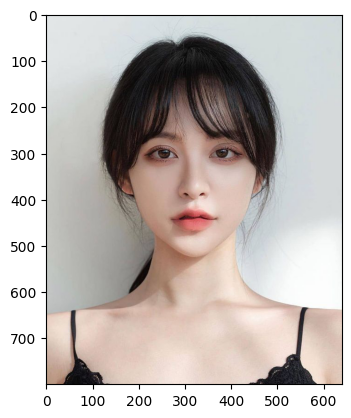

1/1 [==============================] - 0s 31ms/step
Human


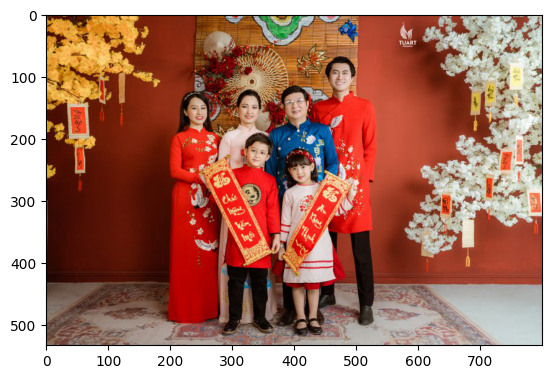

1/1 [==============================] - 0s 30ms/step
Not Human


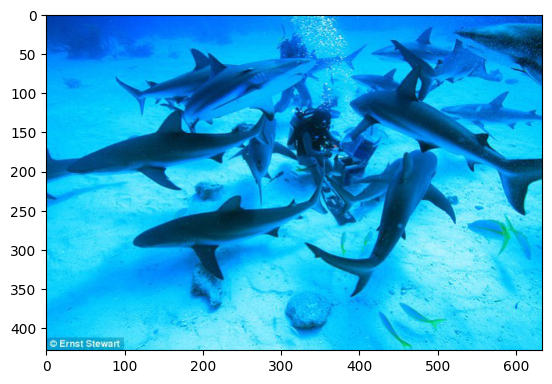

1/1 [==============================] - 0s 32ms/step
Not Human


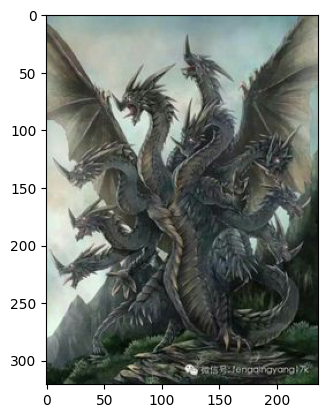

1/1 [==============================] - 0s 31ms/step
Human


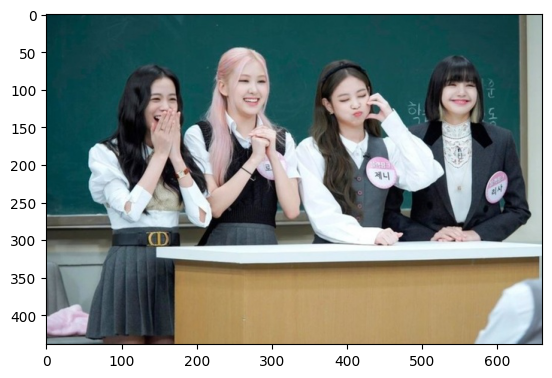

1/1 [==============================] - 0s 39ms/step
Human


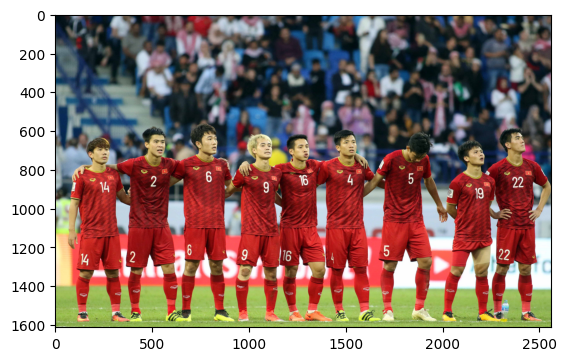

1/1 [==============================] - 0s 35ms/step
Not Human


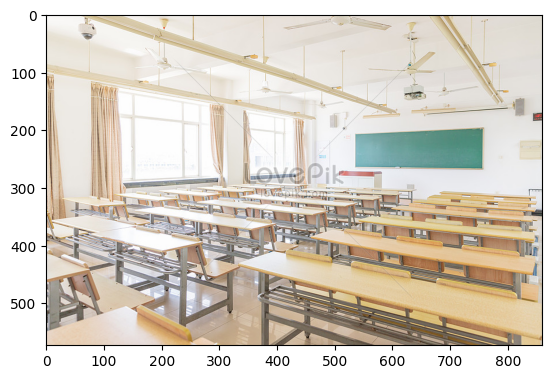

1/1 [==============================] - 0s 35ms/step
Not Human


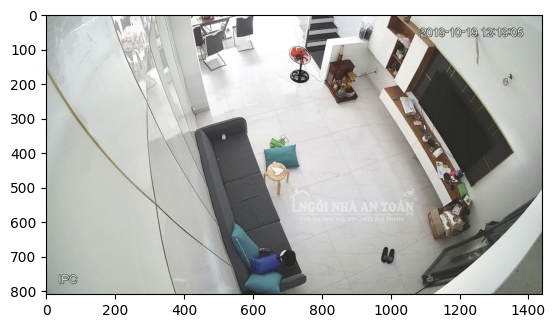

1/1 [==============================] - 0s 35ms/step
Not Human


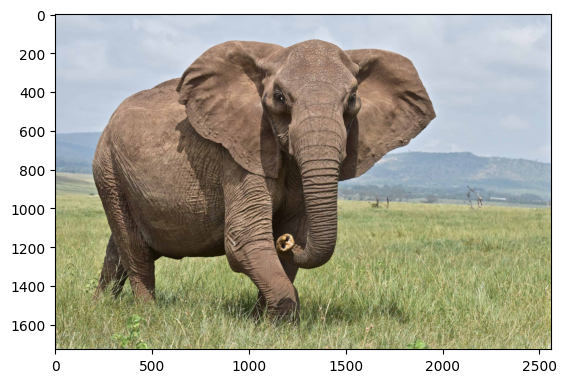

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

path = '/content/drive/MyDrive/Colab Notebooks/common_Image/'

for file in listdir(path):
  photo = load_img(path  +  file)
  plt.imshow(photo)

  photo = load_img(path + file, target_size = (40, 40))
  photo = img_to_array(photo)
  photo = photo.astype('float32')
  photo = photo/255
  photo = np.expand_dims(photo,axis=0)

  result=(model.predict(photo).argmax())
  class_name=['Not Human','Human']
  print(class_name[result])
  plt.show()